- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


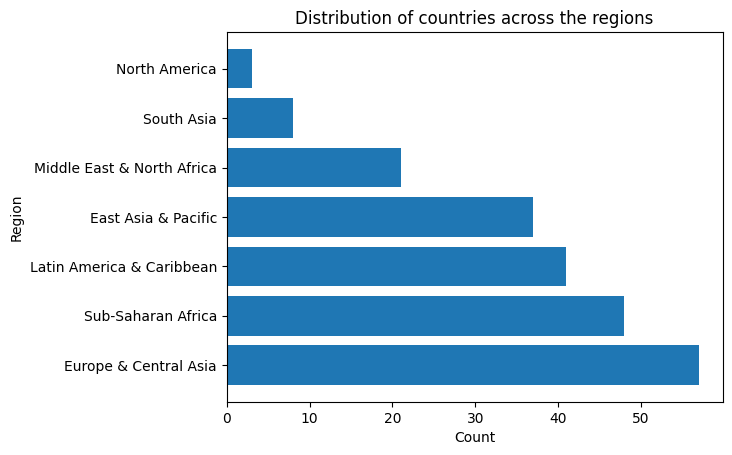

In [3]:
# Vẽ barplot cho các Region

# TODO
region_df = world_df.groupby('Region').size().sort_values(ascending=False)
plt.barh(region_df.index, region_df.values)
plt.title('Distribution of countries across the regions')
plt.ylabel('Region')
plt.xlabel('Count')
plt.show()

(0.0, 60000.0)

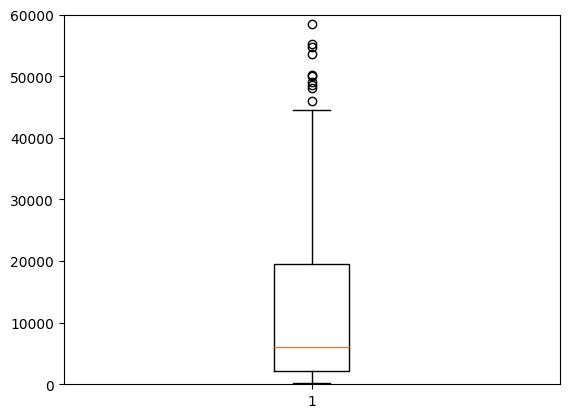

In [4]:
# Vẽ boxplot cho 'GNI per capita (USD)'

# TODO
gni = world_df[world_df['GNI per capita (USD)'].notnull()]
plt.boxplot(gni['GNI per capita (USD)'])
plt.ylim(0,60000)

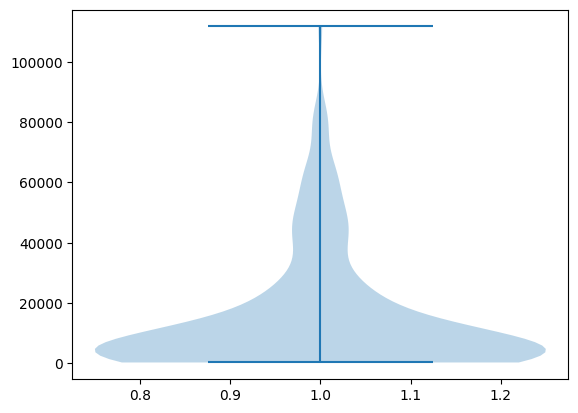

In [5]:
# Vẽ violinplot cho 'GNI per capita (USD)'

# TODO
plt.violinplot(gni['GNI per capita (USD)']);

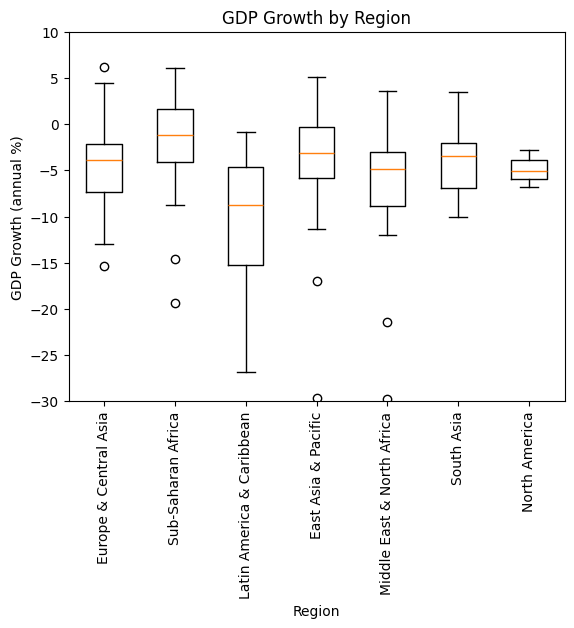

In [6]:
# Vẽ boxplot của các Region lên cùng một biểu đồ

# TODO
datagroup = world_df.dropna(subset=['GDP growth (annual %)', 'Region']).groupby('Region')
datagroup = datagroup['GDP growth (annual %)']
regions = datagroup.size().sort_values(ascending=False).index.tolist()
data = [datagroup.get_group(region).values for region in regions]

plt.boxplot(data, labels=regions)
plt.xticks(rotation=90)
plt.ylim(-30,10)
plt.title('GDP Growth by Region')
plt.xlabel('Region')
plt.ylabel('GDP Growth (annual %)')
plt.show()


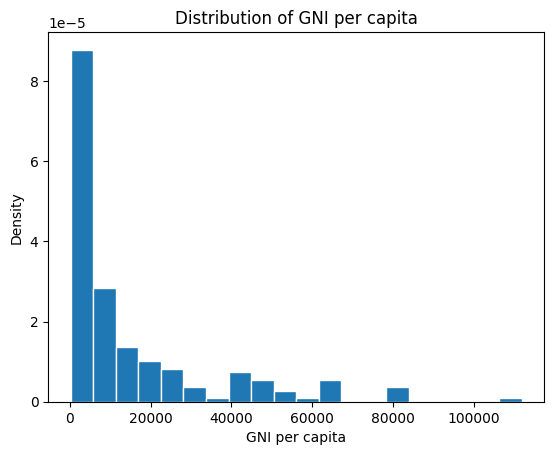

In [7]:
# Vẽ histogram của 'GNI per capita (USD)'

# TODO
plt.hist(world_df['GNI per capita (USD)'].dropna(),bins=20,ec='white',density=True)
plt.title('Distribution of GNI per capita')
plt.xlabel('GNI per capita')
plt.ylabel('Density')
plt.show()

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

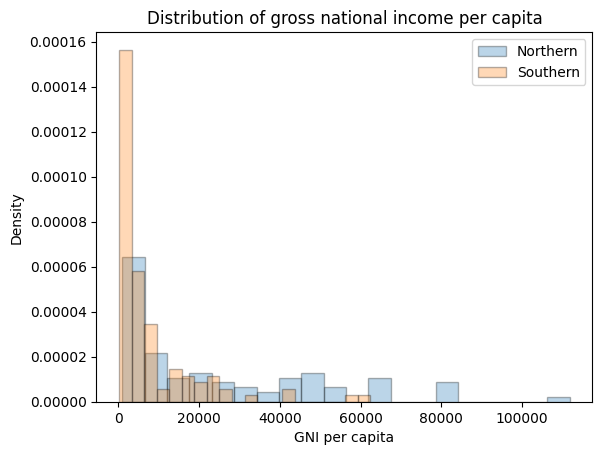

In [8]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# cho bán cầu bắc và bán cầu nam lên cùng một bản đồ

# TODO
northern = ['Europe & Central Asia','North America','East Asia & Pacific']
southern = ['Sub-Saharan Africa','Middle East & North Africa','South Asia','Latin America & Caribbean']
north_df = world_df[world_df['Region'].isin(northern)]['GNI per capita (USD)'].dropna()
south_df = world_df[world_df['Region'].isin(southern)]['GNI per capita (USD)'].dropna()
plt.hist(north_df,bins=20,ec='black',density=True,alpha=0.3,label='Northern')
plt.hist(south_df,bins=20,ec='black',density=True,alpha=0.3,label='Southern')
plt.title('Distribution of gross national income per capita')
plt.xlabel('GNI per capita')
plt.ylabel('Density')
plt.legend()
plt.show()

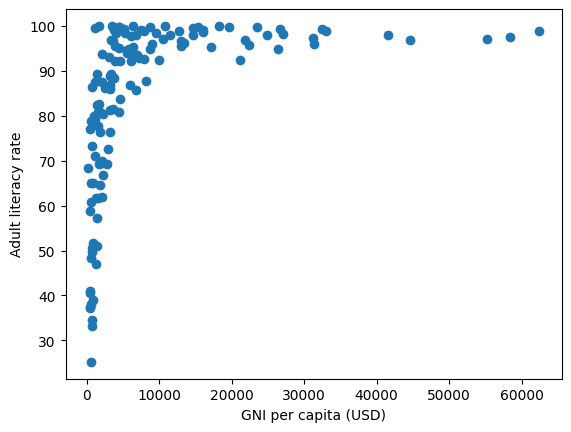

In [9]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'

# TODO
plt.scatter(x='GNI per capita (USD)',y='Adult literacy rate',data=world_df)
plt.ylabel('Adult literacy rate')
plt.xlabel('GNI per capita (USD)')
plt.show()

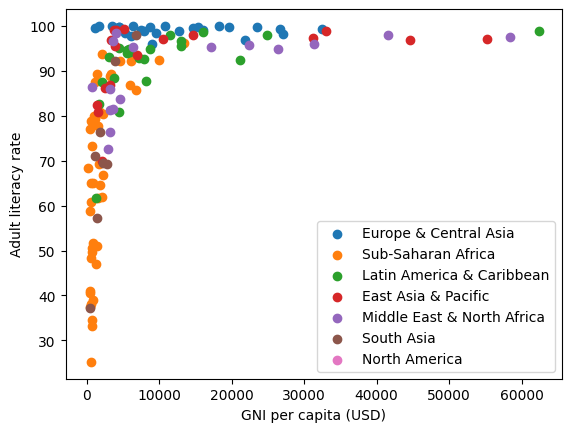

In [10]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau
# TODO
for region in regions:
    plt.scatter(x='GNI per capita (USD)',y='Adult literacy rate',data=world_df[world_df['Region']==region],label=region)
plt.ylabel('Adult literacy rate')
plt.xlabel('GNI per capita (USD)')
plt.legend()
plt.show()

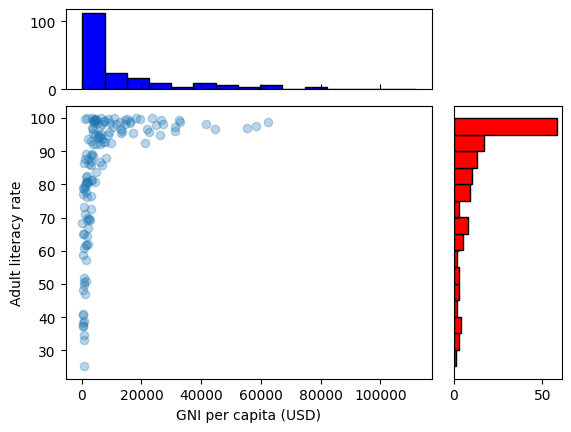

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục

# TODO
x = world_df['GNI per capita (USD)']
y = world_df['Adult literacy rate']
fig = plt.figure()
grid = plt.GridSpec(4, 4)
main_ax = fig.add_subplot(grid[1:, :-1])
y_hist = fig.add_subplot(grid[1:, -1],  sharey=main_ax)
x_hist = fig.add_subplot(grid[0, :-1],  sharex=main_ax)

main_ax.scatter(x,y,alpha=0.3)

x_hist.hist(x, 15, color='blue',ec='black')
y_hist.hist(y, 15, orientation='horizontal', color='red',ec='black')
main_ax.set_xlabel('GNI per capita (USD)')
main_ax.set_ylabel('Adult literacy rate')
x_hist.tick_params(axis='x', direction='in')
y_hist.tick_params(axis='y', direction='in')

plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.show()